In [2]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.6.0


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2256 - accuracy: 0.9150 - val_loss: 0.3853 - val_accuracy: 0.8352
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1767 - accuracy: 0.9363 - val_loss: 0.4207 - val_accuracy: 0.8340
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1339 - accuracy: 0.9542 - val_loss: 0.4692 - val_accuracy: 0.8253
Epoch 4/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0928 - accuracy: 0.9700 - val_loss: 0.5317 - val_accuracy: 0.8184
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.7213 - val_accuracy: 0.8188
Epoch 6/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0445 - accuracy: 0.9870 - val_loss: 0.7573 - val_accuracy: 0.8173
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.7932 - val_accuracy:

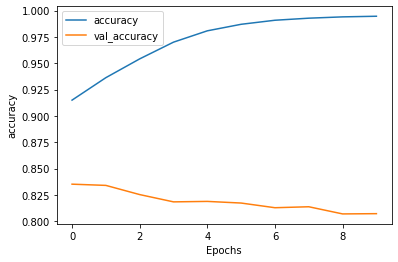

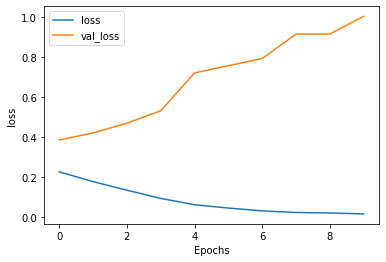

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [10]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 51s 61ms/step - loss: 0.6503 - accuracy: 0.6263 - val_loss: 0.5597 - val_accuracy: 0.7562
Epoch 2/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4416 - accuracy: 0.8071 - val_loss: 0.3934 - val_accuracy: 0.8284
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2975 - accuracy: 0.8837 - val_loss: 0.3727 - val_accuracy: 0.8351
Epoch 4/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2444 - accuracy: 0.9073 - val_loss: 0.4024 - val_accuracy: 0.8313
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2055 - accuracy: 0.9268 - val_loss: 0.4198 - val_accuracy: 0.8216
Epoch 6/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1732 - accuracy: 0.9414 - val_loss: 0.4675 - val_accuracy: 0.8184
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1411 - accuracy: 0.9540 - val_loss: 0.4642 - val_accuracy:

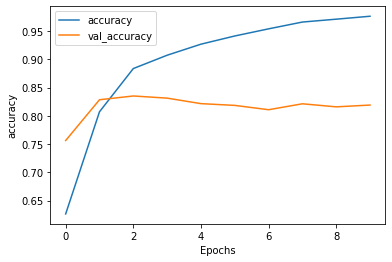

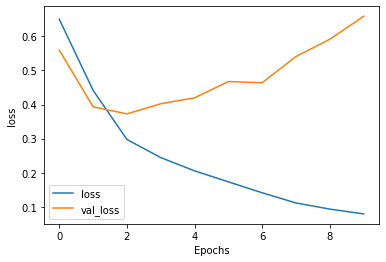

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [7]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 0.4501 - accuracy: 0.7756 - val_loss: 0.3489 - val_accuracy: 0.8490
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2807 - accuracy: 0.8850 - val_loss: 0.3607 - val_accuracy: 0.8435
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2321 - accuracy: 0.9098 - val_loss: 0.4291 - val_accuracy: 0.8194
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1964 - accuracy: 0.9263 - val_loss: 0.4295 - val_accuracy: 0.8290
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1671 - accuracy: 0.9403 - val_loss: 0.4596 - val_accuracy: 0.8256
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1403 - accuracy: 0.9509 - val_loss: 0.5845 - val_accuracy: 0.8128
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1176 - accuracy: 0.9604 - val_loss: 0.5889 - val_accuracy: 0.8195
Epoch

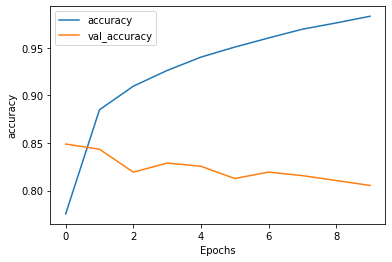

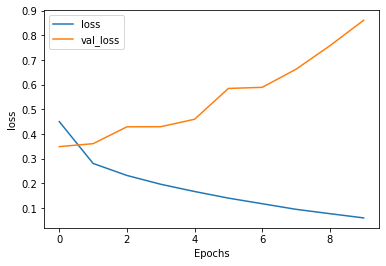

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')